This notebook can be run on mybinder: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgricad-gitlab.univ-grenoble-alpes.fr%2Fchatelaf%2Fml-sicom3a/master?urlpath=lab/tree/notebooks/8_MLP_NN/)

# PERCEPTRON introductory examples 


This code illustrates the behaviour of the perceptron using as many inputs as coordinates in 
an input sample (row), on a binary classification problem. The output decision function is the 
Heaviside step function. 

## 1. Description of the  toy data set
The data set below consists in a set of 10 samples in $\mathbb{R}^2$, containing 2 classes, as shown on the graph


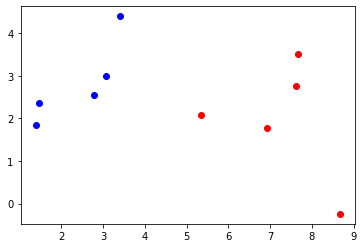

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

data = np.array([[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]])
X = data[:,:-1]
y = data[:,-1]
#data=np.array(dataset)
#print(data.shape)

dataN=X[y==0,:]
dataP=X[y==1,:]
plt.plot(dataP[:,0],dataP[:,1],'or');
plt.plot(dataN[:,0],dataN[:,1],'ob');


## 2. Define a single neuron, with a threshold  step activation function 

**" Predict"** function defined below,  computes 
$$ {\rm activation} = \sum_{k=0}^{{\rm dim}(X)} w[k].X[k] $$
where  $w[0]={\rm bias}$, and $w[k]$, $k=1,\ldots{\rm dim}(X)$ are the neuron inputs.  
The classification rule is defined at the output of the threshold function as 
$$ \hat{y} = \left\{ \begin{array}{ll} +1  \mbox{ if activation } \geq 0 \\
-1 \mbox{ if activation } < 0 \end{array} \right. $$

In [2]:
# Make a prediction with weights
def predict(sample, weights):
    activation = weights[0] + (weights[1:]).dot(sample)
    #for i in range(len(sample)):
    #    activation += weights[i + 1] * sample[i]
    #print(activation)
    prediction = 1 if activation >= 0.0 else 0
    return prediction,activation

### Question 
- Show that the predict function defines an separation hyperplan in $\mathbb{R}^{{\rm dim}(X)}$
- Express the equation of the separation line as a function of the $\{w[k]\}$ in the case dim$(X)$=2
- Show in that latter case that setting $w[2]$=0 amounts to define a threshold on the first coordinate
- Propose a set of values for $\{w[0],w[1],w[2]\}$ which defines a good classifier for the data above. 

## 3. Apply 'Predict' to the data samples and vizualize the decision boundaries

In [3]:
weights=np.array([-4.5, 1, 0])

for (sample, label) in zip(X,y):
    prediction,activation = predict(sample, weights)
    print(f"Expected={label}, Predicted={prediction}, activation={activation:.3f}")

Expected=0.0, Predicted=0, activation=-1.719
Expected=0.0, Predicted=0, activation=-3.035
Expected=0.0, Predicted=0, activation=-1.103
Expected=0.0, Predicted=0, activation=-3.112
Expected=0.0, Predicted=0, activation=-1.436
Expected=1.0, Predicted=1, activation=3.128
Expected=1.0, Predicted=1, activation=0.832
Expected=1.0, Predicted=1, activation=2.423
Expected=1.0, Predicted=1, activation=4.175
Expected=1.0, Predicted=1, activation=3.174


#### Visualize the result for this classifier

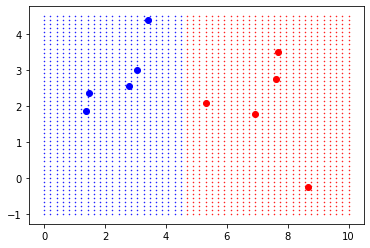

In [4]:
xx=np.linspace(0,10,50)
yy=np.linspace(-1,4.5,50)
XX,YY= np.meshgrid(xx,yy)
XY = np.vstack([XX.flatten(), YY.flatten()]).T
Z=[]

weights=np.array([-4.5, 1, 0])
for sample in XY:
    z,a=predict(sample,weights)
    Z.append(z)
    
Z=np.asarray(Z)

plt.plot(dataP[:,0],dataP[:,1],'or')
plt.plot(dataN[:,0],dataN[:,1],'ob')
plt.scatter(XY[Z==0,0],XY[Z==0,1],s=1,c='b',marker='.')
plt.scatter(XY[Z==1,0],XY[Z==1,1],s=1,c='r',marker='.')
plt.show()

### Question :
* What is the value of the bias (or intercept)? 
* Is this solution unique? 

## 4. Learning weights, using SGD (Stochastic Gradient Descent)

SGD means that the optimization is conducted by taking one sample at a time. 

In [5]:
# Estimate Perceptron weights using stochastic gradient descent
def train_weights(X, y, l_rate, n_epoch):
    weights = np.zeros(X.shape[1]+1)#[0.0 for i in range(len(train[0]))]  # init weights are set to 0. 
    for epoch in range(n_epoch): # here, the number of epochs is set a priori. 
        sum_error = 0.0
        for n in range(len(y)):  # .... for each observation,
            sample, label = X[n,:], y[n]
            #sample=row[:-1]
            prediction, activation = predict(sample, weights)
            error = label - prediction  # row[-1] refers to the last element in row (here, it is the label)
            sum_error += error**2
            weights[0] = weights[0] + l_rate * error  # l_rate = learing rate. 
            weights[1:] = weights[1:] + l_rate * error * sample
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return weights

l_rate = .1
n_epoch = 4
weights = train_weights(X, y, l_rate, n_epoch)
print(weights)


>epoch=0, lrate=0.100, error=2.000
>epoch=1, lrate=0.100, error=1.000
>epoch=2, lrate=0.100, error=0.000
>epoch=3, lrate=0.100, error=0.000
[-0.1         0.2065364  -0.23418118]


### Question
- How many operation (take only multiplication into account) are necessary to complete an epoch in the function train_weights defined above? 
- vary the learning rate above. What do you remark ?

### 5. Apply the weights estimated by SGD and visualize classication results

This section proposes 3 methods to visualize the classification results :

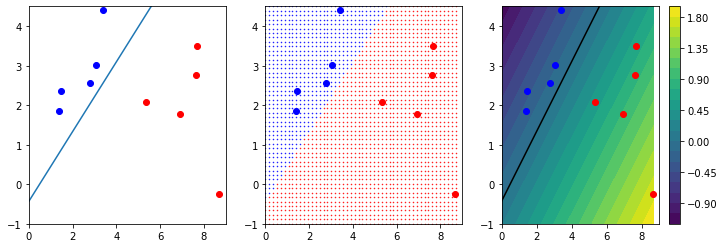

In [6]:
# prediction of labels using new weights

# Visualization

plt.figure(figsize=[12,4])

# plot the separating hyperplane equation
plt.subplot(131)   
xx=np.linspace(0,8.7,50)
xy = (-weights[0]-weights[1]*xx)/weights[2] # just w0 + w.x = 0

plt.plot(dataP[:,0],dataP[:,1],'or')
plt.plot(dataN[:,0],dataN[:,1],'ob')    
plt.axis([0, 9, -1, 4.5])
plt.plot(xx,xy);

# test the sampled observation plane and plot the decision region 
plt.subplot(132) 
yy=np.linspace(-1,8,50)
XX,YX= np.meshgrid(xx,yy)
XY = np.vstack([XX.flatten(), YY.flatten()]).T
Z=[]
A=[]
for sample in XY:
    z,a=predict(sample,weights)
    Z.append(z)
    A.append(a)
    
Z=np.array(Z)
A=np.array(A)

plt.plot(dataP[:,0],dataP[:,1],'or')
plt.plot(dataN[:,0],dataN[:,1],'ob')
plt.scatter(XY[Z==0,0],XY[Z==0,1],s=1,c='b',marker='.')
plt.scatter(XY[Z==1,0],XY[Z==1,1],s=1,c='r',marker='.')
plt.axis([0, 9, -1, 4.5])
xmin, xmax, ymin, ymax = plt.axis()
#plt.show()

# plot the values of the activation values obtained by sampling the observation plane
plt.subplot(133) 
A=np.reshape(A,[xx.size,xy.size])
plt.contourf(XX,YY,A, levels=20)
plt.plot(dataP[:,0],dataP[:,1],'or')
plt.plot(dataN[:,0],dataN[:,1],'ob')
plt.plot(xx,xy,'k');
plt.axis([xmin, xmax, ymin, ymax])
plt.colorbar()

### Question 
- Which of the three representations above is the more informative? 

### 6. Using Scikit-learn perceptron function
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptronlen(dataset)

Estimates weights =[-1.          2.67602374 -3.14159841]


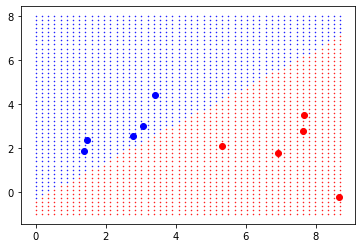

In [7]:
from sklearn.linear_model import Perceptron

clf = Perceptron(eta0=1,fit_intercept=True, max_iter=1000, n_iter_no_change=5, \
                 random_state=0, shuffle=True, tol=0.001)
clf.fit(X,y)
w=np.zeros(3)
w[0]=clf.intercept_
w[1:3]=clf.coef_
print(f"Estimates weights ={w}")

# Visu of decision regions
xx=np.linspace(0,8.7,50)
yy=np.linspace(-1,8,50)
XX,YY= np.meshgrid(xx,yy)
XY = np.vstack([XX.flatten(), YY.flatten()]).T

Z=clf.predict(XY)

plt.plot(dataP[:,0],dataP[:,1],'or')
plt.plot(dataN[:,0],dataN[:,1],'ob')
plt.scatter(XY[Z==0,0],XY[Z==0,1],s=1,c='b',marker='.')
plt.scatter(XY[Z==1,0],XY[Z==1,1],s=1,c='r',marker='.')
xmin, xmax, ymin, ymax = plt.axis()

### Question
- Using the sklearn reference documentation, identify the role of the parameters "Shuffle"
- Discuss the interest of introducing such a parameter
- What was the value of parameter "eta0" in our "train_weights" code? 

## 7. Problem : 

A two class problem is considered, for concentric spiral classes. 
The data are synthetized then represented below :

(-5.736187770492803, 6.3018992477721145, -5.187846101089286, 6.850240917175632)

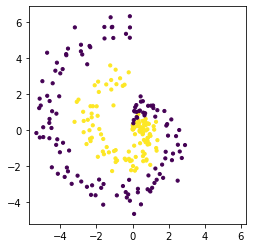

In [8]:

std=.4
N=250

circ_coord = np.zeros((N, 2))
circ_coord[:,0] = 2*np.pi*np.random.rand(N)
circ_coord[:int(N/2), 1] = np.abs(.1 + .5*circ_coord[:int(N/2), 0] + std*np.random.randn(int(N/2)))
circ_coord[int(N/2):, 1] = np.abs(1 + .8*circ_coord[int(N/2):, 0] + std*np.random.randn(int(N/2)))

X = np.zeros((N,2))
X[:,0] = circ_coord[:,1]*np.sin(circ_coord[:,0])
X[:,1] = circ_coord[:,1]*np.cos(circ_coord[:,0])

label = np.zeros(N)
label[:int(N/2)]=1

plt.scatter(X[:,0], X[:,1],c=label,s=10)
plt.axis('square')


### Question 
- Do you think that a perceptron is a performant classifier for this problem?

Learning the perceptron from the learning set (X,y) and visulizing the decision region is performed below:

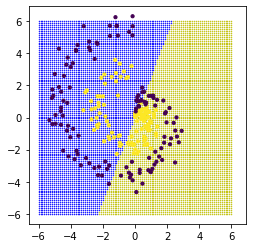

In [9]:
clf = Perceptron(eta0=1,fit_intercept=True, max_iter=10000, n_iter_no_change=5, \
                 random_state=0, shuffle=True, tol=0.001, \
                 validation_fraction=0.1,warm_start=True)
clf.fit(X,label)

# Visu of decision regions
xx=np.linspace(-6,6,100)
yy=np.linspace(-6,6,100)
XX,YY= np.meshgrid(xx,yy)
XY = np.vstack([XX.flatten(), YY.flatten()]).T
    
Z=clf.predict(XY)   
plt.scatter(XY[Z==0,0],XY[Z==0,1],s=1,c='b',marker='.')
plt.scatter(XY[Z==1,0],XY[Z==1,1],s=1,c='y',marker='.')
plt.scatter(X[:,0],X[:,1],c=label,s=10)
plt.axis('square');

### Exercise
Propose a coordinate change that would make the problem linearly separable. What do you conclude about the choice of the representation space of the analyzed data? Display the new classification frontier

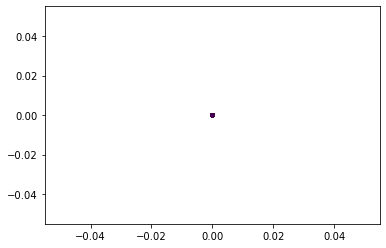

In [10]:
def to_circ_coord(X):
    res = np.zeros((X.shape[0],2))
    ## TODO: implement the change of coordinate here
    return res
newX = to_circ_coord(X)
plt.scatter(newX[:,0], newX[:,1],c=label,s=10)